In [37]:
# ---------- 1) Load & clean ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
import matplotlib as mpl

In [38]:
df = pd.read_csv("cars.csv") 
print(df.shape) 
display(df) 
print(df.columns)

(392, 7)


,model,MPG,cylinders,horsepower,weigth,year,origin
0,chevrolet chevelle malibu,18.0,8,130,3504,70,US
1,buick skylark 320,15.0,8,165,3693,70,US
2,plymouth satellite,18.0,8,150,3436,70,US
3,amc rebel sst,16.0,8,150,3433,70,US
4,ford torino,17.0,8,140,3449,70,US
...,...,...,...,...,...,...,...
387,ford mustang gl,27.0,4,86,2790,82,US
388,vw pickup,44.0,4,52,2130,82,Europe
389,dodge rampage,32.0,4,84,2295,82,US
390,ford ranger,28.0,4,79,2625,82,US


Index(['model', 'MPG', 'cylinders', 'horsepower', 'weigth', 'year', 'origin'], dtype='object')


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                                    model   mpg  cylinders  horsepower  \
0               chevrolet chevelle malibu  18.0          8         130   
1                       buick skylark 320  15.0          8         165   
2                      plymouth satellite  18.0          8         150   
3                           amc rebel sst  16.0          8         150   
4                             ford torino  17.0          8         140   
5                        ford galaxie 500  15.0          8         198   
6                        chevrolet impala  14.0          8         220   
7                       plymouth fury iii  14.0          8         215   
8                        pontiac catalina  14.0          8         225   
9                      amc ambassador dpl  15.0          8         190   
10                    dodge challenger se  15.0          8         170   
11                     plymouth 'cuda 340  14.0          8         160   
12                  chevrolet monte ca

In [40]:
numeric_cols = ['MPG', 'cylinders', 'horsepower', 'weigth', 'year']
for col in numeric_cols:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}, range = {df[col].max() - df[col].min()}")
categorical_cols = ['origin']
for col in categorical_cols:
    print(f"{col} unique values ({df[col].nunique()}): {df[col].unique()}")


MPG: min = 9.0, max = 46.6, range = 37.6
cylinders: min = 3, max = 8, range = 5
horsepower: min = 46, max = 230, range = 184
weigth: min = 1613, max = 5140, range = 3527
year: min = 70, max = 82, range = 12
origin unique values (3): ['US' 'Japan' 'Europe']


In [41]:
print(df['cylinders'].unique())
print(df['horsepower'].unique())

[8 4 6 3 5]
[130 165 150 140 198 220 215 225 190 170 160  95  97  85  88  46  87  90
 113 200 210 193 100 105 175 153 180 110  72  86  70  76  65  69  60  80
  54 208 155 112  92 145 137 158 167  94 107 230  49  75  91 122  67  83
  78  52  61  93 148 129  96  71  98 115  53  81  79 120 152 102 108  68
  58 149  89  63  48  66 139 103 125 133 138 135 142  77  62 132  84  64
  74 116  82]


### Car feature types ###
Nominal <br>
- model, origin 

Quantitative <br>
- Continuous (ratio): MPG, horsepower, weight  
- Discrete (ratio): cylinders  
- (interval): year

<br>
So most accurate:



Plots:
- X years, Cyllinders Shapes, Y MPG () [boxplots?]
- X years, Y mean weights, Origin colours (difference in heavy cars per country)
-  (fuel efficiency)
- Weight vs MPG
- X weight, Y MPG, C origin, Si horsepower

### Explain about all vlaues we have, missing data, what ocllumns, features, how many rows. ###

We are using Jupyter notebook as it has a structured way of discovering data types and easy integration of libraries like matplotlib and scaoling of data.

Y MPG, X year, Color Origiin, Size HorsePower, Cyl Transparancy,   

In [42]:
# ---------- 1) Load & clean ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
import matplotlib as mpl

def load_and_clean(path="cars.csv"):
    df = pd.read_csv(path, na_values=["?", "NA", "NaN", ""])
    df.columns = df.columns.str.strip().str.lower()
    df = df.rename(columns={"weigth": "weight"})  # fix typo if present

    # Coerce numeric
    for col in ["mpg", "cylinders", "horsepower", "weight", "year"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Origin as string labels (some files use 1/2/3)
    if "origin" in df.columns:
        if pd.api.types.is_numeric_dtype(df["origin"].dropna()):
            df["origin"] = df["origin"].map({1: "US", 2: "Europe", 3: "Japan"})
        df["origin"] = (
            df["origin"].astype(str).str.strip().str.title()
            .replace({"Us": "US", "U.S.": "US"})
        )

    # Expand two-digit years to 1970–1982
    if "year" in df.columns:
        df["year"] = df["year"].apply(
            lambda v: np.nan if pd.isna(v) else (v if v >= 1900 else 1900 + int(v))
        )

    # Impute horsepower for sizing so we don't drop rows
    if "horsepower" in df.columns:
        hp_imp = df["horsepower"].copy()
        if {"cylinders", "year"}.issubset(df.columns):
            hp_imp = hp_imp.fillna(df.groupby(["cylinders", "year"])["horsepower"].transform("median"))
        if "cylinders" in df.columns:
            hp_imp = hp_imp.fillna(df.groupby("cylinders")["horsepower"].transform("median"))
        hp_imp = hp_imp.fillna(df["horsepower"].median())
        df["hp_size"] = hp_imp

    return df

df = load_and_clean("cars.csv")
print("Shape after cleaning:", df.shape)
print("Columns:", list(df.columns))


Shape after cleaning: (392, 8)
Columns: ['model', 'mpg', 'cylinders', 'horsepower', 'weight', 'year', 'origin', 'hp_size']


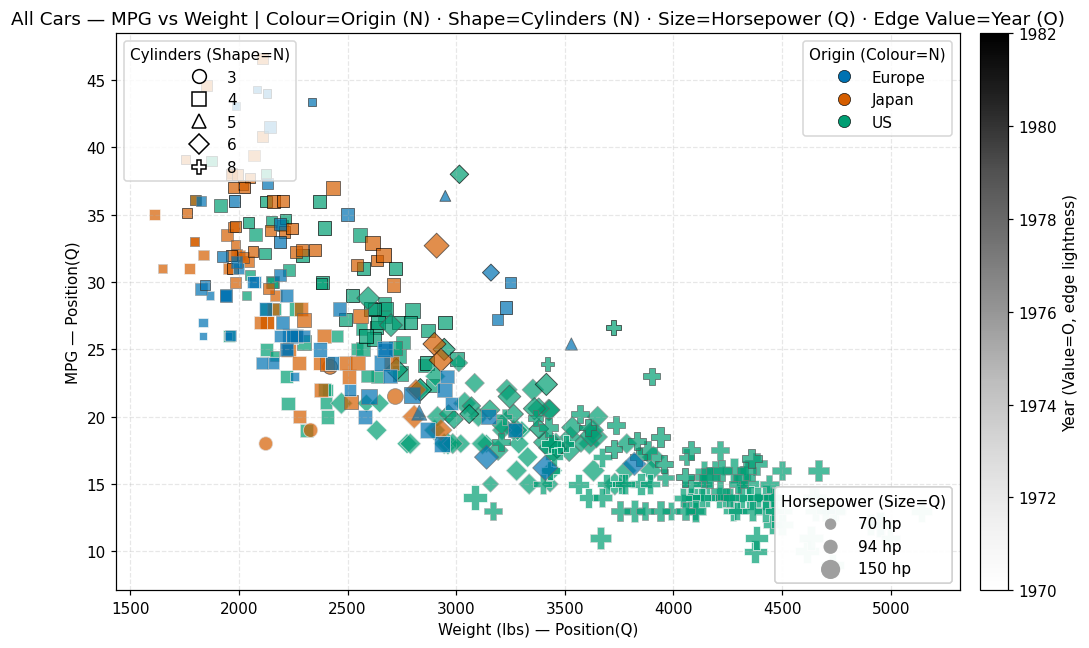

In [43]:
# ---------- 2) One comprehensive plot (ALL data) ----------
plot = df.dropna(subset=["mpg", "weight", "cylinders", "origin", "year"]).copy()

# Size mapping for horsepower (continuous)
hp = plot["hp_size"].astype(float).to_numpy()
hp_min, hp_max = np.nanmin(hp), np.nanmax(hp)
def scale_hp(v, smin=24, smax=260):
    if np.isnan(v) or hp_max == hp_min:
        return (smin + smax) / 2
    return smin + (v - hp_min) / (hp_max - hp_min) * (smax - smin)
sizes = np.vectorize(scale_hp)(hp)

# Colour for Origin (Nominal) — Okabe–Ito/Wong palette
palette = {"US": "#009E73", "Europe": "#0072B2", "Japan": "#D55E00"}
for o in plot["origin"].unique():
    palette.setdefault(o, "#000000")  # any unexpected label

# Shape for Cylinders (Nominal)
unique_cyl = sorted(plot["cylinders"].astype(int).unique())
marker_cycle = ["o", "s", "^", "D", "P", "v", "X", "<", ">"]
marker_map = {c: marker_cycle[i % len(marker_cycle)] for i, c in enumerate(unique_cyl)}

# Value (lightness) for Year (Ordered/interval) using GREYS on marker EDGE
norm = Normalize(vmin=int(plot["year"].min()), vmax=int(plot["year"].max()))
grey_cmap = mpl.cm.Greys

fig, ax = plt.subplots(figsize=(10, 6), dpi=110)

# Plot ALL points (group by origin×cyl to apply hue+shape); edge lightness encodes year
for o in plot["origin"].unique():
    sub_o = plot[plot["origin"] == o]
    for c in unique_cyl:
        sub = sub_o[sub_o["cylinders"] == c]
        if sub.empty:
            continue
        edgecols = grey_cmap(norm(sub["year"].to_numpy()))
        ax.scatter(
            sub["weight"], sub["mpg"],
            s=np.vectorize(scale_hp)(sub["hp_size"].to_numpy(float)),
            c=palette[o],                  # Colour(N): origin
            marker=marker_map[c],          # Shape(N): cylinders
            edgecolors=edgecols,           # Value(O): year via edge lightness
            linewidths=0.6,
            alpha=0.7,
        )

# Legends
# Origin (colour)
color_handles = [
    Line2D([0], [0], marker="o", linestyle="",
           markerfacecolor=palette[o], markeredgecolor="black", markeredgewidth=0.4,
           markersize=8, label=o)
    for o in sorted(plot["origin"].unique())
]
leg1 = ax.legend(handles=color_handles, title="Origin (Colour=N)", loc="upper right", frameon=True)
ax.add_artist(leg1)

# Cylinders (shape)
shape_handles = [
    Line2D([0], [0], marker=marker_map[c], linestyle="",
           markerfacecolor="white", markeredgecolor="black",
           markersize=9, label=str(int(c)))
    for c in unique_cyl
]
leg2 = ax.legend(handles=shape_handles, title="Cylinders (Shape=N)", loc="upper left", frameon=True)
ax.add_artist(leg2)

# Horsepower (size) — continuous, show example sizes
hp_ticks = np.round(np.quantile(hp[~np.isnan(hp)], [0.15, 0.5, 0.85])).astype(int)
size_handles = [plt.scatter([], [], s=scale_hp(v), c="#7F7F7F", alpha=0.7, edgecolors="none", label=f"{v} hp")
                for v in hp_ticks]
leg3 = ax.legend(handles=size_handles, title="Horsepower (Size=Q)", loc="lower right", frameon=True, scatterpoints=1)
ax.add_artist(leg3)

# Year (value) — grayscale colorbar for edge lightness
sm = mpl.cm.ScalarMappable(cmap=grey_cmap, norm=norm); sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Year (Value=O, edge lightness)")

# Axes & labeling to reflect Bertin encodings
ax.set_xlabel("Weight (lbs) — Position(Q)")
ax.set_ylabel("MPG — Position(Q)")
ax.set_title("All Cars — MPG vs Weight | Colour=Origin (N) · Shape=Cylinders (N) · Size=Horsepower (Q) · Edge Value=Year (O)")
ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


We can make up from this plot that 
US cars gneerally have more horsepower, with heavier cars. Japan and europe generally have lighter cars with horsepower. Thus, there appears to be a linear relationship between horsepower and weight, which makes sense logically, as heavier cars tend to need more horsepower to drive. Additionally, an inversely proportional relationship between weight and MPG shows that heavier cars are generally more fuel efficient.  

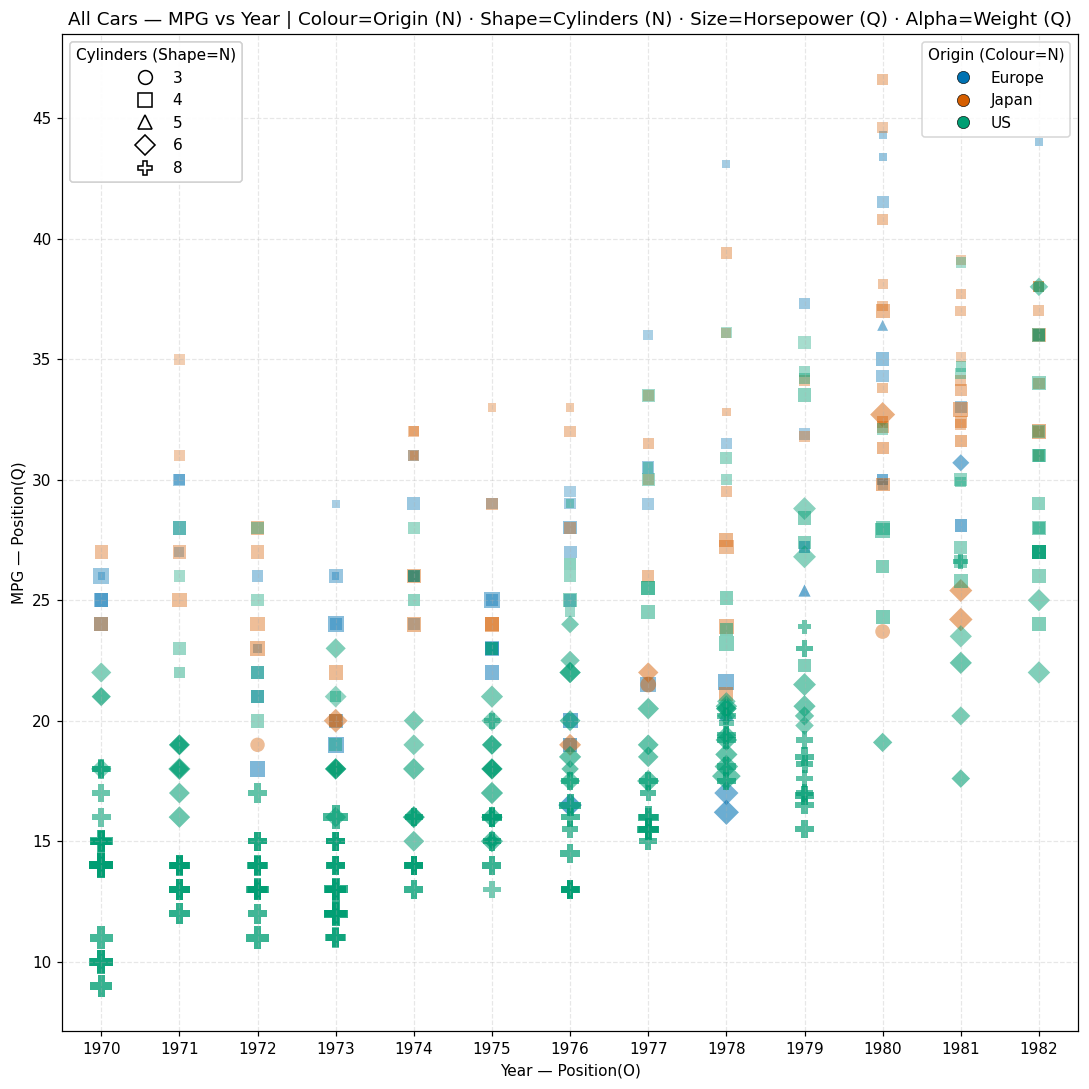

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# --- Use the cleaned df from before ---
plot = df.dropna(subset=["mpg", "weight", "cylinders", "origin", "year"]).copy()

# If hp_size not present (from earlier cleaning), fall back to horsepower with median fill
if "hp_size" not in plot.columns:
    hp_tmp = pd.to_numeric(plot.get("horsepower"), errors="coerce")
    plot["hp_size"] = hp_tmp.fillna(hp_tmp.median())

# ----- Size mapping: horsepower (continuous, no legend) -----
hp = plot["hp_size"].astype(float).to_numpy()
hp_min, hp_max = float(np.nanmin(hp)), float(np.nanmax(hp))
def scale_hp(v, smin=24, smax=260):
    if np.isnan(v) or hp_max == hp_min:
        return (smin + smax) / 2
    return smin + (v - hp_min) / (hp_max - hp_min) * (smax - smin)

# ----- Colour: Origin (nominal) — Okabe–Ito palette -----
palette = {"US": "#009E73", "Europe": "#0072B2", "Japan": "#D55E00"}
for o in plot["origin"].unique():
    palette.setdefault(o, "#000000")

# ----- Shape: Cylinders (nominal) -----
unique_cyl = sorted(plot["cylinders"].astype(int).unique())
marker_cycle = ["o", "s", "^", "D", "P", "v", "X", "<", ">"]
marker_map = {c: marker_cycle[i % len(marker_cycle)] for i, c in enumerate(unique_cyl)}

# ----- Alpha (transparency): Weight (quantitative) -----
w = plot["weight"].astype(float).to_numpy()
w_min, w_max = float(np.nanmin(w)), float(np.nanmax(w))
# Keep even the most transparent points visible
ALPHA_MIN, ALPHA_MAX = 0.30, 0.85
def alpha_from_weight(val):
    if np.isnan(val) or w_max == w_min:
        return (ALPHA_MIN + ALPHA_MAX) / 2
    return ALPHA_MIN + (val - w_min) / (w_max - w_min) * (ALPHA_MAX - ALPHA_MIN)

# ----- X as discrete Year (ordered/interval) -----
plot["year"] = plot["year"].astype(int)

fig, ax = plt.subplots(figsize=(10, 10), dpi=110)

# Draw per Origin × Cylinders group (so colour+shape are correct)
for o in sorted(plot["origin"].unique()):
    sub_o = plot[plot["origin"] == o]
    base_rgb = mcolors.to_rgb(palette[o])
    for c in unique_cyl:
        sub = sub_o[sub_o["cylinders"] == c]
        if sub.empty:
            continue

        # Per-point alpha based on weight -> build RGBA colors
        alphas = sub["weight"].apply(alpha_from_weight).to_numpy()
        rgba = np.column_stack([
            np.full(len(sub), base_rgb[0]),
            np.full(len(sub), base_rgb[1]),
            np.full(len(sub), base_rgb[2]),
            alphas
        ])

        ax.scatter(
            sub["year"], sub["mpg"],
            s=sub["hp_size"].apply(scale_hp).to_numpy(),
            c=rgba,                               # Colour with per-point alpha (Weight)
            marker=marker_map[c],                 # Shape = Cylinders
            edgecolors='none'                     # avoid edges overpowering alpha
        )

# Legends (colour = Origin, shape = Cylinders). No size legend (continuous).
color_handles = [
    Line2D([0], [0], marker="o", linestyle="",
           markerfacecolor=palette[o], markeredgecolor="black", markeredgewidth=0.4,
           markersize=8, label=o)
    for o in sorted(plot["origin"].unique())
]
leg1 = ax.legend(handles=color_handles, title="Origin (Colour=N)", loc="upper right", frameon=True)
ax.add_artist(leg1)

shape_handles = [
    Line2D([0], [0], marker=marker_map[c], linestyle="",
           markerfacecolor="white", markeredgecolor="black",
           markersize=9, label=str(int(c)))
    for c in unique_cyl
]
leg2 = ax.legend(handles=shape_handles, title="Cylinders (Shape=N)", loc="upper left", frameon=True)
ax.add_artist(leg2)

# Axes and ticks for discrete years
years = sorted(plot["year"].unique())
ax.set_xticks(years)
ax.set_xlim(min(years) - 0.5, max(years) + 0.5)

ax.set_xlabel("Year — Position(O)")
ax.set_ylabel("MPG — Position(Q)")
ax.set_title("All Cars — MPG vs Year | Colour=Origin (N) · Shape=Cylinders (N) · Size=Horsepower (Q) · Alpha=Weight (Q)")
ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


discuss effectiveness of visualizatioin.